In [1]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
data.drop(columns='CustomerID', inplace=True)

In [3]:
# Check for missing values in each column
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Descriptive statistics for the dataset
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


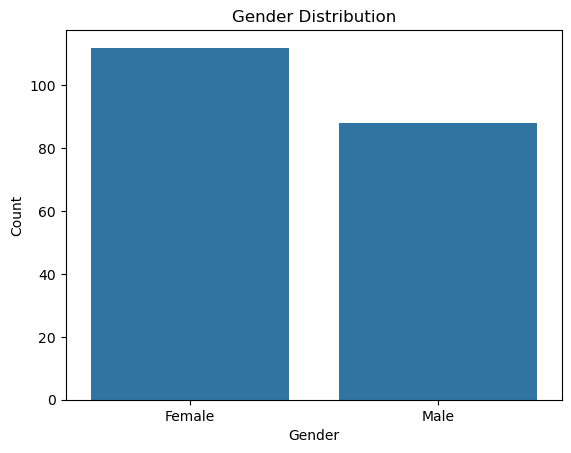

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution analysis
gender_counts = data['Gender'].value_counts()

# Plot gender distribution
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

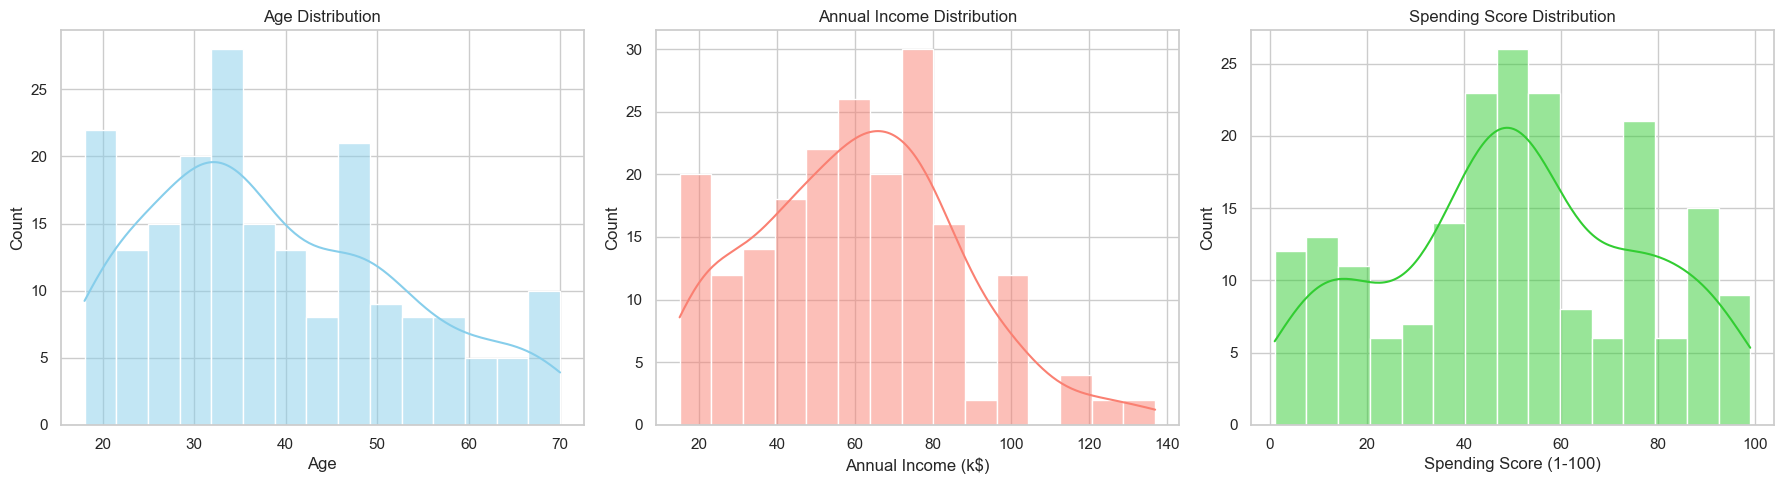

In [6]:
sns.set(style="whitegrid")

# Plot distributions for Age, Annual Income, and Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
sns.histplot(data['Age'], bins=15, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')

# Annual Income distribution
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Annual Income Distribution')
axes[1].set_xlabel('Annual Income (k$)')

# Spending Score distribution
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, ax=axes[2], color='limegreen')
axes[2].set_title('Spending Score Distribution')
axes[2].set_xlabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

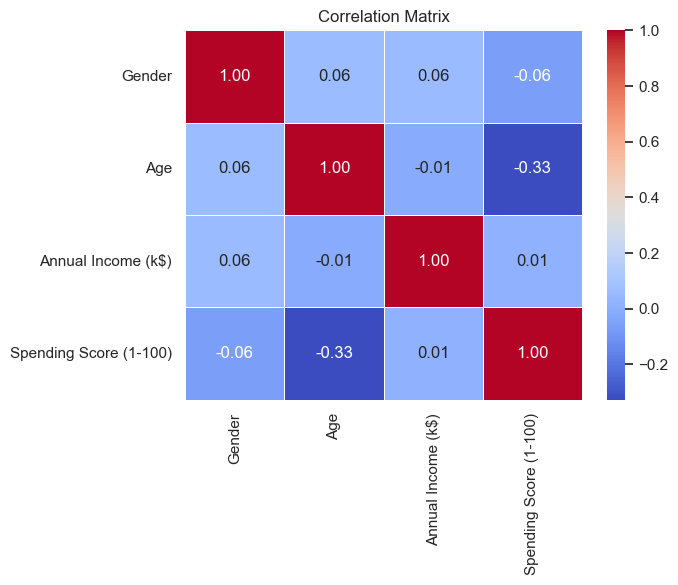

In [8]:
# Compute correlation matrix for numeric columns
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(data) 

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

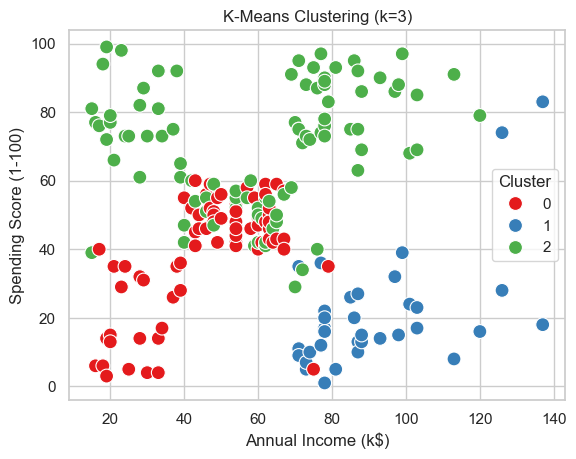

In [11]:
# Plot the clusters
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=data,
    palette='Set1',
    s=100
)

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

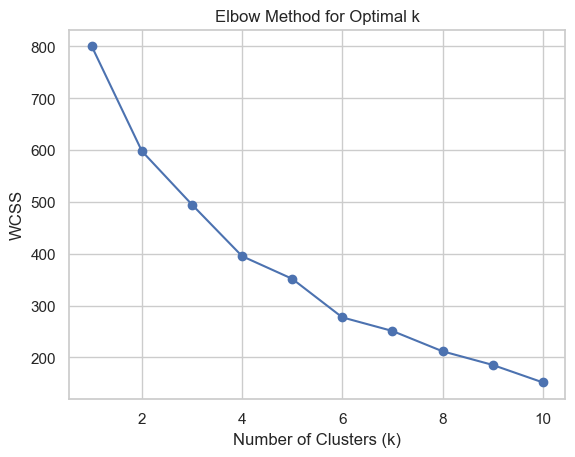

In [13]:
# Plot the Elbow Method chart
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

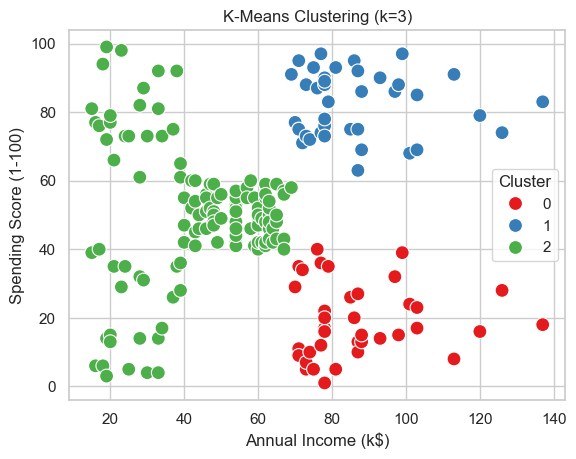

In [14]:
X = X[:, 2:]

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=data,
    palette='Set1',
    s=100
)

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

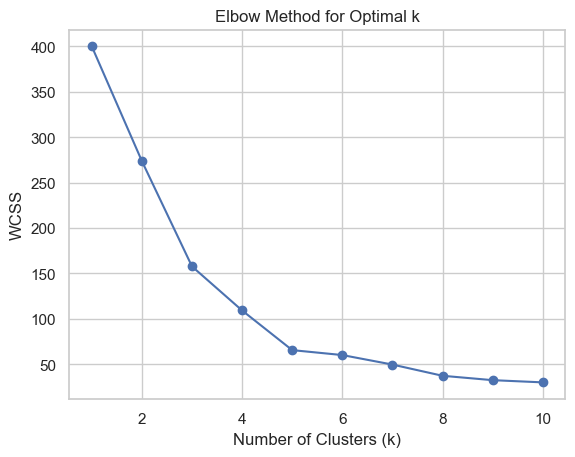

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method chart
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()